<a href="https://colab.research.google.com/github/CamilaTovarm/Library/blob/master/BERT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalar librerías clave (si no están preinstaladas)
!pip install tensorflow transformers pandas numpy matplotlib seaborn scikit-learn

# Importar librerías
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## OPCION A
from google.colab import files
uploaded = files.upload()  # Sube tu archivo CSV
df = pd.read_csv('dataset.csv')

# Dividir datos en entrenamiento y prueba
texts = df['text'].tolist()
labels = df['label'].tolist()
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

## OPCION B
# Ejemplo con dataset de Kaggle (simulado)
data = {
    'text': [
        "No puedo más con esta vida...",
        "Hoy me siento genial, ¡qué buen día!",
        "¿Alguien me ayuda? No quiero seguir así.",
    ],
    'label': [1, 0, 1]  # 1 = riesgo, 0 = normal
}
df = pd.DataFrame(data)
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2)


# Cargar tokenizador de BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# Tokenizar textos (convertir palabras a números)
train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=128)

# Convertir a formato TensorFlow
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
)).shuffle(100).batch(16)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
)).batch(16)

# Cargar modelo BERT para clasificación
model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=2)

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Entrenamiento
history = model.fit(
    train_dataset,
    epochs=3,
    validation_data=test_dataset
)

# Graficar precisión y pérdida
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Predecir un ejemplo nuevo
def predict_risk(text):
    inputs = tokenizer(text, return_tensors="tf", truncation=True, padding=True, max_length=128)
    outputs = model(inputs)
    logits = outputs.logits
    probas = tf.nn.softmax(logits, axis=-1)
    return probas.numpy()[0][1]  # Probabilidad de riesgo (clase 1)

ejemplo = "Estoy pensando en desaparecer..."
print(f"Riesgo de suicidio: {predict_risk(ejemplo) * 100:.2f}%")

model.save_pretrained("modelo_deteccion_suicidio")
tokenizer.save_pretrained("tokenizer_deteccion_suicidio")

# Para cargarlo después:
# loaded_model = TFBertForSequenceClassification.from_pretrained("modelo_deteccion_suicidio")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
10/10 [==============================] - 155s 11s/step - loss: 0.6970 - accuracy: 0.5500 - val_loss: 0.6233 - val_accuracy: 0.8500
Epoch 2/3
10/10 [==============================] - 91s 9s/step - loss: 0.4313 - accuracy: 0.8500 - val_loss: 0.1162 - val_accuracy: 0.9750
Epoch 3/3
10/10 [==============================] - 85s 9s/step - loss: 0.1578 - accuracy: 0.9688 - val_loss: 0.0239 - val_accuracy: 1.0000


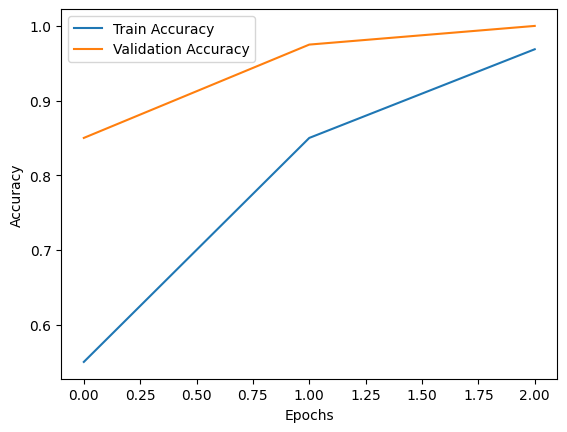

Riesgo de suicidio: 96.71%


('tokenizer_deteccion_suicidio/tokenizer_config.json',
 'tokenizer_deteccion_suicidio/special_tokens_map.json',
 'tokenizer_deteccion_suicidio/vocab.txt',
 'tokenizer_deteccion_suicidio/added_tokens.json')

In [1]:
!pip install tensorflow transformers pandas numpy matplotlib seaborn scikit-learn

import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

positivas = [
    "Estoy feliz con mi vida.",
    "Hoy fue un buen día.",
    "Estoy agradecido por lo que tengo.",
    "Mis amigos me apoyan siempre.",
    "Tengo metas claras que quiero alcanzar.",
    "Me siento motivado a seguir adelante.",
    "Estoy disfrutando cada momento.",
    "Me gusta quién soy.",
    "Hoy salí a caminar y me hizo bien.",
    "Estoy trabajando en mis sueños.",
    "Disfruto pasar tiempo con mi familia.",
    "Tengo muchas razones para sonreír.",
    "Me va bien en el trabajo.",
    "Amo compartir con los que quiero.",
    "Estoy contento con mis logros.",
    "Me siento en paz hoy.",
    "Estoy emocionado por el futuro.",
    "Tengo salud y energía.",
    "Estoy avanzando en mi vida.",
    "Gracias por estar conmigo.",
]

riesgo = [
    "No quiero seguir viviendo.",
    "Todo me duele, incluso respirar.",
    "Siento que nadie me necesita.",
    "Estoy cansado de fingir que estoy bien.",
    "Quiero desaparecer.",
    "No encuentro una salida.",
    "Mi vida no tiene sentido.",
    "Solo quiero dormir y no despertar.",
    "Nadie me va a extrañar.",
    "Estoy harto de todo.",
    "Siento que me hundo cada día más.",
    "No tengo fuerzas para seguir.",
    "Odio levantarme cada mañana.",
    "Estoy solo, completamente solo.",
    "Me siento como una carga.",
    "No hay nada que me motive.",
    "Estoy al borde del colapso.",
    "Cada día es peor que el anterior.",
    "Me rindo.",
    "Quisiera dejar de existir.",
]

def expandir(frases, n):
    variaciones = [
        "", " Hoy fue especialmente difícil.", " No sé cuánto más podré soportar.",
        " Pero trato de seguir adelante.", " Aunque me cuesta admitirlo.",
        " Esto no se lo cuento a nadie.", " Solo escribo esto para desahogarme.",
        " A veces pienso que todo sería más fácil si me fuera."
    ]
    ampliadas = []
    while len(ampliadas) < n:
        base = random.choice(frases)
        var = random.choice(variaciones)
        ampliadas.append(base + var)
    return ampliadas[:n]

# Crear dataset
n_clase = 100
textos = expandir(positivas, n_clase) + expandir(riesgo, n_clase)
etiquetas = [0]*n_clase + [1]*n_clase

# Mezclar
combined = list(zip(textos, etiquetas))
random.shuffle(combined)
textos, etiquetas = zip(*combined)

# Crear DataFrame
df = pd.DataFrame({'text': textos, 'label': etiquetas})

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Tokenizador BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# Tokenización
train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=128)

# Dataset TensorFlow
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_train)).shuffle(100).batch(16)
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), y_test)).batch(16)

# Modelo BERT para clasificación
model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=2)

# Compilación
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Entrenamiento
history = model.fit(train_dataset, epochs=3, validation_data=test_dataset)

# Gráfica de precisión
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Predicción de nuevo texto
def predict_risk(text):
    inputs = tokenizer(text, return_tensors="tf", truncation=True, padding=True, max_length=128)
    outputs = model(inputs)
    logits = outputs.logits
    probas = tf.nn.softmax(logits, axis=-1)
    return probas.numpy()[0][1]  # Probabilidad de riesgo (clase 1)

ejemplo = "Estoy pensando en desaparecer..."
print(f"Riesgo de suicidio: {predict_risk(ejemplo) * 100:.2f}%")

# Guardar modelo y tokenizer
model.save_pretrained("modelo_deteccion_suicidio")
tokenizer.save_pretrained("tokenizer_deteccion_suicidio")

# Para cargar después:
# from transformers import TFBertForSequenceClassification, BertTokenizer
# model = TFBertForSequenceClassification.from_pretrained("modelo_deteccion_suicidio")
# tokenizer = BertTokenizer.from_pretrained("tokenizer_deteccion_suicidio")
